In [5]:
# Use this cell to regroup all your imports
%load_ext autoreload
%autoreload 2
from deep_currents.model import Model
from sklearn import set_config; set_config(display='diagram')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

## Train data

In [2]:
m = Model()

In [3]:
m.open_data()

## Test data

# Prepare data

## Build pipeline for preproc data

This pipeline is important to adjust the data to enter in the DL model.

We are applying two corrections:
- KNNImputer: to impute value when we have missing data. It will get the closest value to complete
- Standardcale: to use ML and DL models, we have to rescale all variables to the same scale. I choose Standard sclae, but it will depends on the hist distribuition of the variations (normal distribution and outliers)

(array([ 48., 144., 106.,  72.,  59.,  56.,  67.,  49.,  27.,  20.]),
 array([294.6000061 , 294.73620605, 294.87240601, 295.00860596,
        295.14480591, 295.28100586, 295.41720581, 295.55340576,
        295.68960571, 295.82580566, 295.96200562]),
 <BarContainer object of 10 artists>)

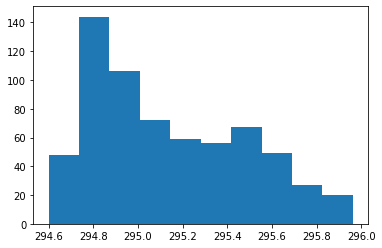

In [6]:
plt.hist(m.X[0][17:-1])

(array([3., 1., 0., 0., 0., 1., 1., 2., 3., 5.]),
 array([0.7934 , 0.80665, 0.8199 , 0.83315, 0.8464 , 0.85965, 0.8729 ,
        0.88615, 0.8994 , 0.91265, 0.9259 ]),
 <BarContainer object of 10 artists>)

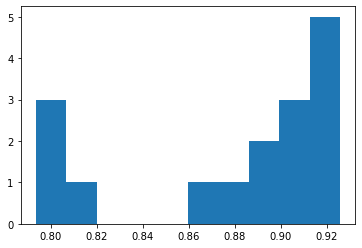

In [7]:
plt.hist(m.X[0][0:16])

In [8]:
m.preproc()

StandardScaler()

## Preproc data

Fit the data ⬇️

In [9]:
m.preproc_fit()

# Machine Learning

In [10]:
m.basic_ml(model='ridge')

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [11]:
m.validation_split(test_size=0.3)

In [12]:
m.score_baseline()

MSE = 16.276942909686902


2.9770894782485766


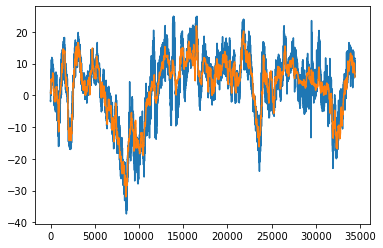

In [13]:
m.predict_baseline()

# Deep Learning

## Preproc data

In [64]:
m.preproc_transform()

## Initialize model

See the shape of your data and try insert the number of columns in the input_dim value

In [69]:
m.define_model()


learning rate: 0.001
Loss = msle
Metric = mae
Opt = adam
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 120)               80040     
_________________________________________________________________
dense_38 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_39 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_40 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_41 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
______________________________________________________________

Initialize modal and show its summary

## Fit model to your data

In [70]:
m.validation_split(test_size=0.3, deep=True)

In [71]:
m.learning_rate()

In [72]:
m.model_fit()

Early stop with patience 10
Batch size 32
Epoch = 100
Validation Split = 30%
Epoch 1/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.5887 - mae: 6.1113 - val_loss: 0.5587 - val_mae: 5.6088
Epoch 2/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.4558 - mae: 5.6914 - val_loss: 0.3894 - val_mae: 5.5068
Epoch 3/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.4083 - mae: 5.4880 - val_loss: 0.3721 - val_mae: 5.3985
Epoch 4/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.3796 - mae: 5.3640 - val_loss: 0.3597 - val_mae: 5.1429
Epoch 5/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.3552 - mae: 5.2404 - val_loss: 0.3041 - val_mae: 5.0572
Epoch 6/300
1054/1054 [==============================] - 3s 2ms/step - loss: 0.3254 - mae: 5.0810 - val_loss: 0.3599 - val_mae: 5.1910
Epoch 7/300
1054/1054 [==============================] - 3s 3ms/step - loss: 0.3116 - mae: 5.0903 - val_loss: 0.3

## Evaluate the model

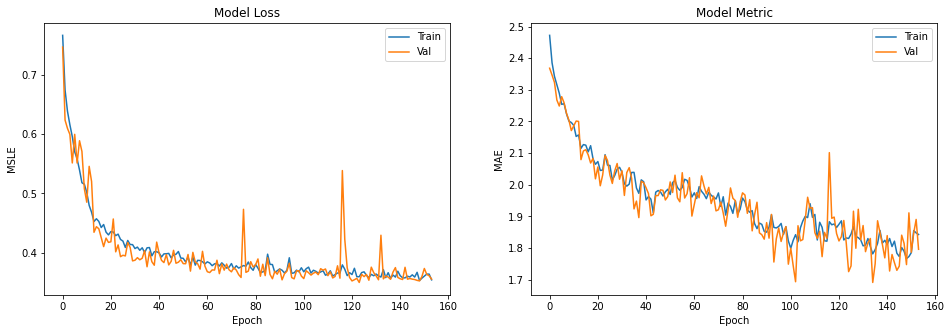

In [73]:
m.plot_history()

In [74]:
m.model_evaluate()

MSLE = 0.123694509267807
MAE = 3.2725911140441895


## Predict the data

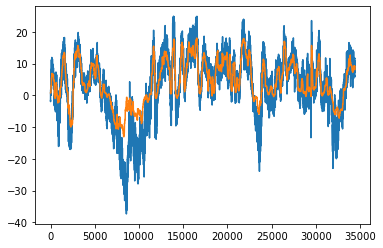

In [77]:
m.predict_deep()